In [1]:
import gen as g
from tqdm import tqdm

In [2]:
def generate():
    dead_farmers = 0
    
    
    
    recommended_species = None
    
    chosen_class = None
    
    background = None

    while not (recommended_species and chosen_class and background):
        
        stats, attempts = g.roll_stats()
        
        dead_farmers += attempts

        recommended_species = g.recommend_species(stats)
        
        
        updated_stats = g.apply_species_bonus(stats, recommended_species)

        optimal_stats = g.sort_stats(updated_stats)
    
        chosen_class = g.select_class(optimal_stats)
    
        background = g.pick_background(optimal_stats)
    
    return recommended_species, chosen_class, background
    

In [3]:
def track_species_selection(num_iterations):
    species_count = {}
    classes_count = {}
    background_count = {}
    for _ in tqdm(range(num_iterations)):
        species, chosen_class, chosen_background = generate()
        if species in species_count:
            species_count[species] += 1
        else:
            species_count[species] = 1
            
        if chosen_class in classes_count:
            classes_count[chosen_class] += 1
        else:
            classes_count[chosen_class] = 1
            
        if chosen_background in background_count:
            background_count[chosen_background] += 1
        else:
            background_count[chosen_background] = 1

    return species_count, classes_count, background_count

species_results, class_results, background_results = track_species_selection(10000)

# Print the results
for species, count in species_results.items():
    print(f"{species}: {count}")
    
    # Print the results
for chosen_class, count in class_results.items():
    print(f"{chosen_class}: {count}")
    
    # Print the results
for chosen_background, count in background_results.items():
    print(f"{chosen_background}: {count}")

100%|████████████████████████████████████| 10000/10000 [00:48<00:00, 207.15it/s]

Half-Elf: 2839
Elf (High): 896
Elf (Wood): 761
Dwarf (Mountain): 376
Tiefling: 250
Halfling (Lightfoot): 368
Half-Orc: 382
Dwarf (Hill): 411
Gnome (Forest): 269
Human: 2138
Elf (Drow): 507
Halfling (Stout): 390
Dragonborn: 304
Gnome (Rock): 109
Cleric: 1093
Druid: 455
Monk: 444
Artificer: 1033
Rogue: 644
Sorcerer: 1246
Wizard: 629
Paladin: 1314
Bard: 651
Warlock: 717
Barbarian: 316
Fighter: 961
Ranger: 497
Outlander: 515
Urchin: 922
Charlatan: 934
Sage: 701
Sailor: 508
Entertainer: 526
Criminal/Spy: 873
Knight: 524
Noble: 544
Gladiator: 540
Acolyte: 792
Hermit: 527
Folk Hero: 521
Soldier: 572
Guild Artisan: 478
Pirate: 523


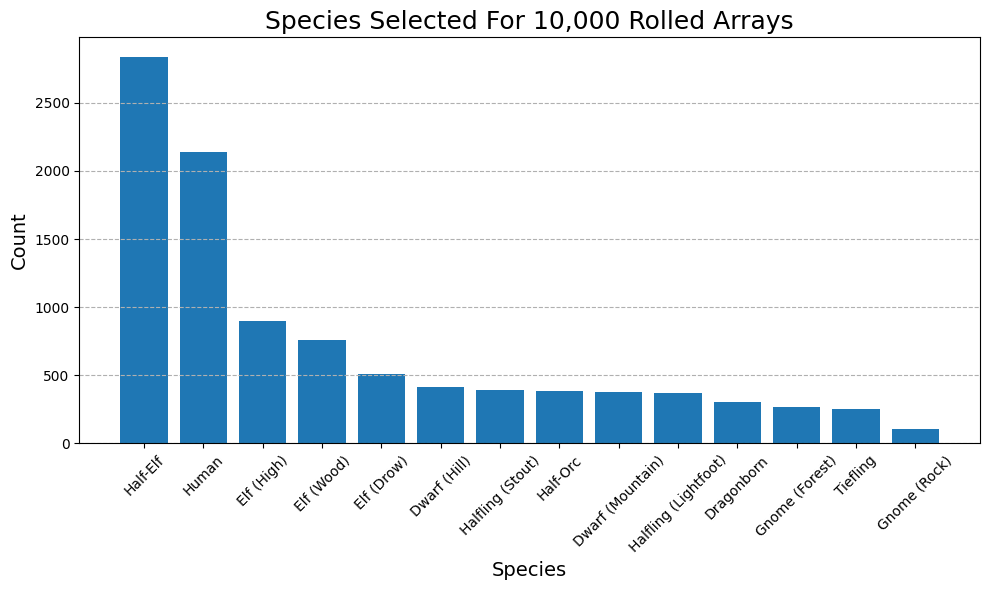

In [4]:
import matplotlib.pyplot as plt
sorted_species = sorted(species_results.items(), key=lambda item: item[1], reverse=True)
    
species, counts = zip(*sorted_species)

plt.figure(figsize=(10, 6))
plt.bar(species, counts)
plt.title('Species Selected For 10,000 Rolled Arrays', fontsize = 18)
plt.xlabel('Species', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('results.png')

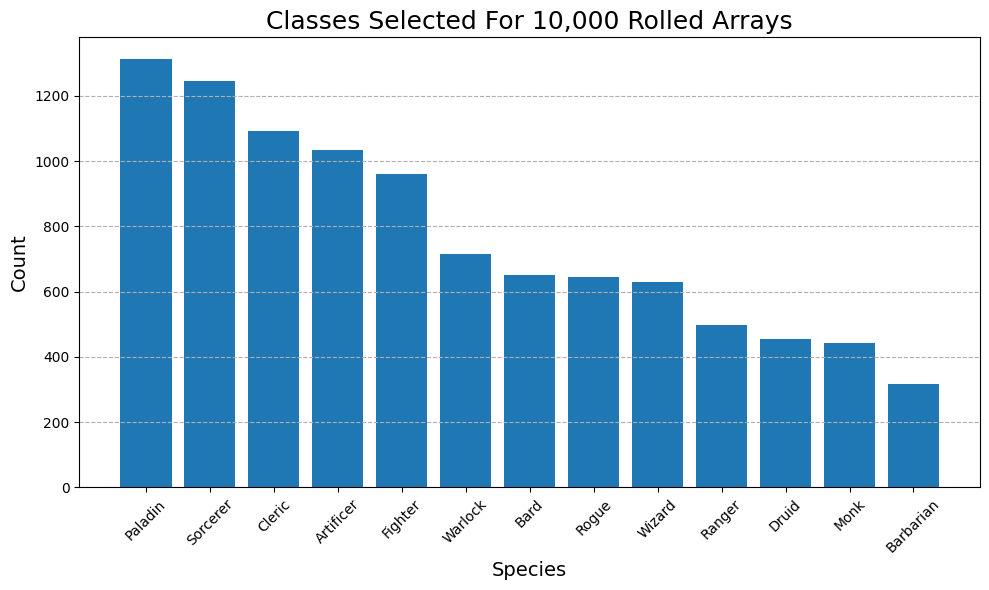

In [5]:
import matplotlib.pyplot as plt
sorted_species = sorted(class_results.items(), key=lambda item: item[1], reverse=True)
    
    # Unzip the sorted results into two lists
species, counts = zip(*sorted_species)

plt.figure(figsize=(10, 6))
plt.bar(species, counts)
plt.title('Classes Selected For 10,000 Rolled Arrays', fontsize = 18)
plt.xlabel('Species', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('results.png')

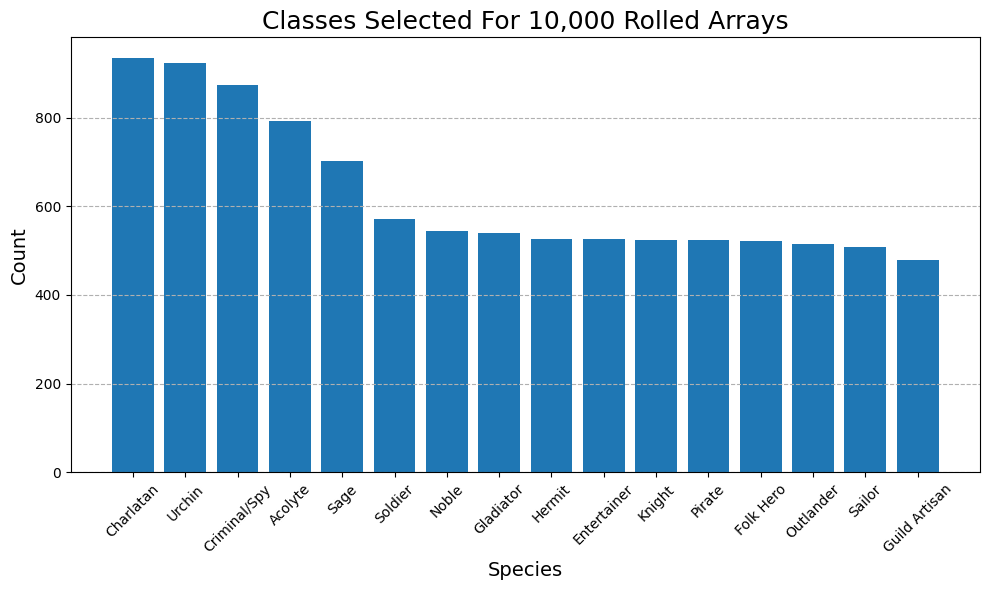

In [6]:
import matplotlib.pyplot as plt
sorted_species = sorted(background_results.items(), key=lambda item: item[1], reverse=True)
    
    # Unzip the sorted results into two lists
species, counts = zip(*sorted_species)

plt.figure(figsize=(10, 6))
plt.bar(species, counts)
plt.title('Classes Selected For 10,000 Rolled Arrays', fontsize = 18)
plt.xlabel('Species', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('results.png')